# Morgan & Morgan Business Analyst Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
settle= pd.read_excel('settlement.xlsx')
emp=pd.read_excel('employee.xlsx')

## 1. Department's total revenue and average fee in 2019, 2020 & 2021

In [3]:
growth=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')[['Resolution Date','Case Expenses','Settlement Amount','Department','Office']]
growth['year']=pd. DatetimeIndex(pd.to_datetime(growth['Resolution Date'],format='%Y%m%d')).year
growth['revenue']=growth['Settlement Amount']-growth['Case Expenses']
growth

,Resolution Date,Case Expenses,Settlement Amount,Department,Office,year,revenue
0,2020-03-31,2197,6666.660,Workers Comp,Chicago,2020,4469.660
1,2020-03-31,1142,4666.660,Workers Comp,Chicago,2020,3524.660
2,2020-03-31,1636,6666.660,Workers Comp,Chicago,2020,5030.660
3,2020-03-31,3913,10000.000,Workers Comp,Chicago,2020,6087.000
4,2020-05-11,2658,6666.660,Workers Comp,Chicago,2020,4008.660
...,...,...,...,...,...,...,...
46911,2021-07-15,1360,13200.000,Personal Injury,Kansas City,2021,11840.000
46912,2021-07-15,204,799.992,Personal Injury,Kansas City,2021,595.992
46913,2021-07-22,4446,39999.996,Personal Injury,Kansas City,2021,35553.996
46914,2021-07-27,2820,13200.000,Personal Injury,Kansas City,2021,10380.000


### Total Revenue 

In [4]:
revenue=pd.melt(growth[['revenue','year','Department']].groupby(['Department','year']).sum().T)
revenue['value']=round(revenue['value'].astype('int64')/100000,2)
revenue.head()

,Department,year,value
0,Business Law,2019,208.54
1,Business Law,2020,314.64
2,Business Law,2021,228.28
3,Medical Malpractice,2019,425.44
4,Medical Malpractice,2020,398.46


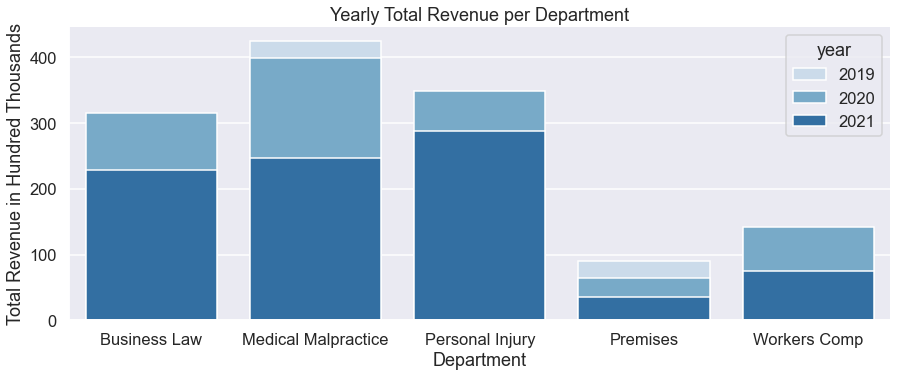

In [15]:
sns.set('talk')
ax=sns.catplot(x='Department',y='value',hue='year',data=revenue,kind='bar',dodge = False,aspect=2.5,palette="Blues", legend_out=False)\
.set(ylabel='Total Revenue in Hundred Thousands', xlabel='Department', title='Yearly Total Revenue per Department')

### Average Fee

In [6]:
expenses=pd.melt(growth[['Case Expenses','year','Department']].groupby(['Department','year']).mean().T)
expenses.head(5)

,Department,year,value
0,Business Law,2019,7581.247448
1,Business Law,2020,7826.965902
2,Business Law,2021,9095.051711
3,Medical Malpractice,2019,2517.737203
4,Medical Malpractice,2020,2792.480585


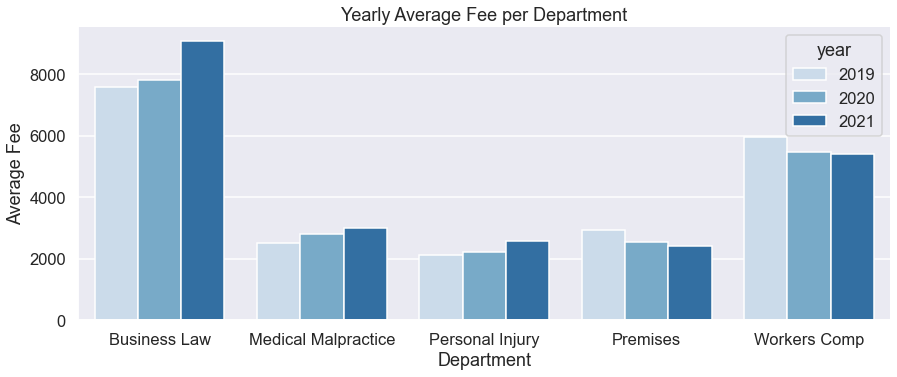

In [28]:
sns.set('talk')
ax=sns.catplot(x='Department',y='value',hue='year',data=expenses,kind='bar',aspect=2.5,palette="Blues", legend_out=False)\
.set(ylabel='Average Fee', xlabel='Department', title='Yearly Average Fee per Department')


## 2. Office's year-over-year growth in revenue.

In [8]:
of_rev=pd.melt(growth[['year', 'Office','revenue']].groupby(["Office",'year']).sum().T)
of_rev['value']=round(of_rev['value'].astype('int64')/100000,2)
of_rev.head(5)

,Office,year,value
0,Boston,2019,32.90
1,Boston,2020,34.20
2,Boston,2021,32.65
3,Chicago,2019,239.53
4,Chicago,2020,218.04


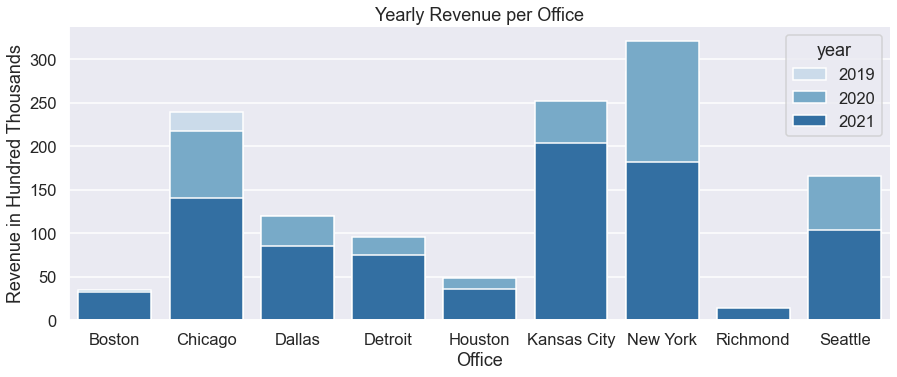

In [27]:
sns.set('talk')
ax=sns.catplot(x='Office',y='value',hue='year',data=of_rev,dodge = False,kind='bar',aspect=2.5,palette="Blues", legend_out=False)\
.set(ylabel='Revenue in Hundred Thousands', xlabel='Office', title='Yearly Revenue per Office')

## 3. Detailed analysis of which departments or offices the firm should expand or scale back.


## 4. Attorneys that should be put on a PIP